# Реализация метода главных компонент

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# задаём начальное значение ГСЧ для воспроизводимости результатов
np.random.seed(seed=333)

## Генерация признаков с линейной зависимостью

In [3]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))
print(X)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]
 [ 5.43436858  4.64938666  5.0509132   7.72416339 11.04987914 11.28432833
  12.54359016 14.71582709 17.36590469 17.56199714]]


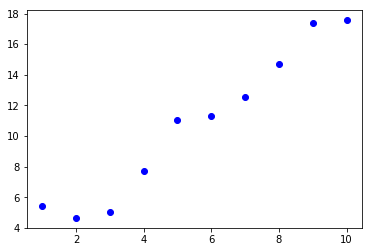

In [4]:
plt.plot(x, y, 'bo')

## Центрирование данных

In [5]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
print(Xcentered)
print("Mean vector: ", m)

(array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]), array([-5.30366725, -6.08864918, -5.68712264, -3.01387244,  0.3118433 ,
        0.5462925 ,  1.80555433,  3.97779125,  6.62786885,  6.8239613 ]))
Mean vector:  (5.5, 10.738035839550268)


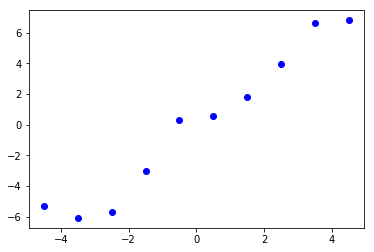

In [6]:
plt.plot(Xcentered[0], Xcentered[1], 'bo')

## Построение ковариационной матрицы

In [7]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 14.5100879 ]
 [14.5100879  24.06677232]] 

Variance of X:  9.166666666666666
Variance of Y:  24.06677231982029
Covariance X and Y:  14.510087896623931


## Вычисление собственных векторов

In [8]:
_, vecs = np.linalg.eig(covmat)
vecs

array([[-0.85344965, -0.5211753 ],
       [ 0.5211753 , -0.85344965]])

## Получение вектора главных компонент

In [9]:
v = -vecs[:,1]
v

array([0.5211753 , 0.85344965])

In [10]:
Xnew = np.dot(v, Xcentered)
Xnew

array([-6.87170182e+00, -7.02046906e+00, -6.15661108e+00, -3.35395134e+00,
        5.55490111e-03,  7.26820790e-01,  2.32271266e+00,  4.69778280e+00,
        7.48066590e+00,  8.16919624e+00])

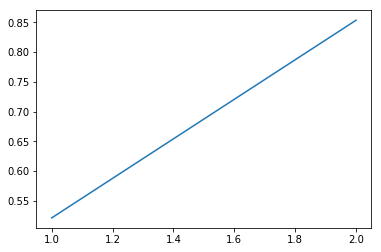

In [16]:
plt.plot([1,2], v)

## Восстановление исходных данных

In [11]:
n = 9     #номер элемента случайной величины
Xrestored = np.dot(Xnew[n], v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [ 9.75758332 17.71003351]
Original:  [10.         17.56199714]


## Проверка алгоритма

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

XPCAreduced = pca.fit_transform(np.transpose(X))

In [13]:
print('Our reduced X: \n', Xnew)
print('Sklearn reduced X: \n', XPCAreduced)

Our reduced X: 
 [-6.87170182e+00 -7.02046906e+00 -6.15661108e+00 -3.35395134e+00
  5.55490111e-03  7.26820790e-01  2.32271266e+00  4.69778280e+00
  7.48066590e+00  8.16919624e+00]
Sklearn reduced X: 
 [[-6.87170182e+00]
 [-7.02046906e+00]
 [-6.15661108e+00]
 [-3.35395134e+00]
 [ 5.55490111e-03]
 [ 7.26820790e-01]
 [ 2.32271266e+00]
 [ 4.69778280e+00]
 [ 7.48066590e+00]
 [ 8.16919624e+00]]


In [14]:
print('Вектор средних: ', pca.mean_, m)
print('Вектор(матрица) проекции: ', pca.components_, v)
print('Доля информации (доля от общей дисперсии): ', pca.explained_variance_ratio_)

Вектор средних:  [ 5.5        10.73803584] (5.5, 10.738035839550268)
Вектор(матрица) проекции:  [[0.5211753  0.85344965]] [0.5211753  0.85344965]
Доля информации (доля от общей дисперсии):  [0.99079828]
